In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# prepare dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# reshape images and normalize
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255.


In [79]:
# 1.autoencoder
hidden_layer = 64
autoencoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28,28,1)),
            tf.keras.layers.Flatten(),
            # encode
            tf.keras.layers.Dense(hidden_layer, activation='relu',input_shape=(28*28,)),
            # decode
            tf.keras.layers.Dense(28*28, activation='sigmoid',input_shape=(hidden_layer,)),
            tf.keras.layers.Reshape((28,28,1),input_shape=(28*28,))
        ])
autoencoder.compile('adam',loss=tf.keras.losses.BinaryCrossentropy())

In [74]:
# train
autoencoder.fit(x_train, x_train,
          batch_size = 256,
          epochs = 10,
          shuffle=True,
          validation_data = (x_test,x_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2441 - val_loss: 0.1616
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1425 - val_loss: 0.1258
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1181 - val_loss: 0.1090
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1045 - val_loss: 0.0981
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0953 - val_loss: 0.0906
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0889 - val_loss: 0.0854
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0844 - val_loss: 0.0819
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0813 - val_loss: 0.0793
Epoch 9/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0793 - val_

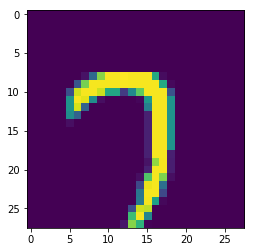

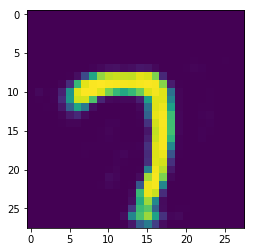

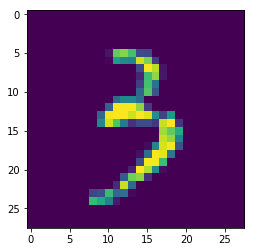

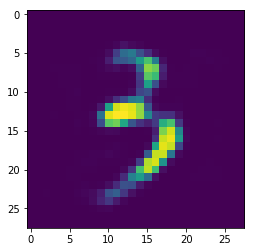

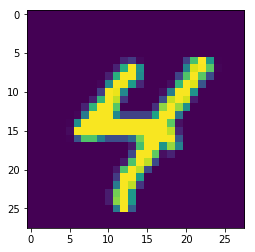

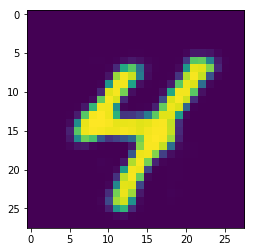

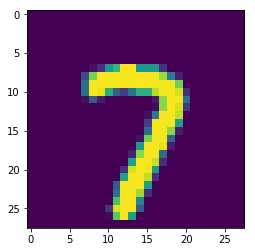

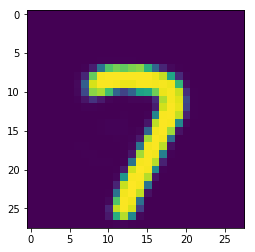

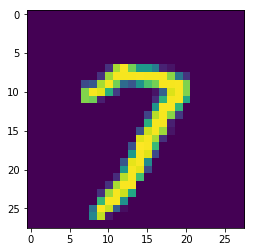

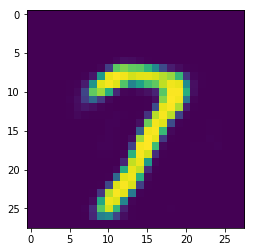

In [75]:
# test
generated = autoencoder.predict(x_test)

for i in np.random.choice(len(x_test), 5):
    real = x_test[i].reshape((28,28)) * 255.
    fake = generated[i].reshape((28,28)) * 255.
    plt.figure()
    plt.imshow(real.astype("uint8"))
    plt.figure()
    plt.imshow(fake.astype("uint8"))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1995 - val_loss: 0.1290
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1167 - val_loss: 0.1071
Epoch 3/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1042 - val_loss: 0.0997
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0981 - val_loss: 0.0958
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0944 - val_loss: 0.0924
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0917 - val_loss: 0.0898
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0897 - val_loss: 0.0888
Epoch 8/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0882 - val_loss: 0.0875
Epoch 9/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.08

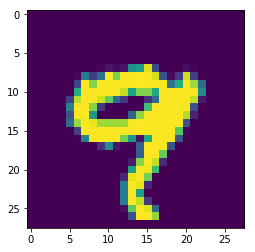

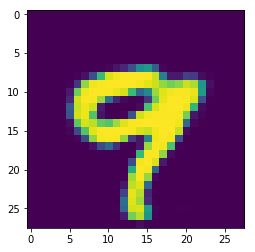

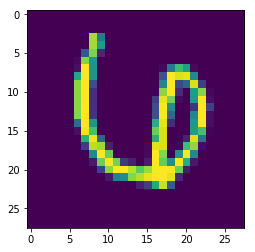

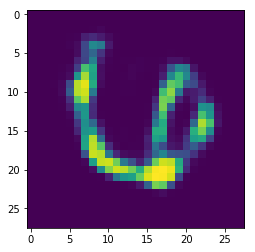

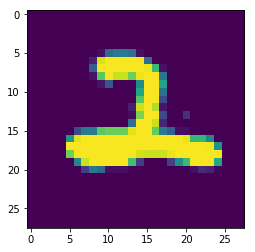

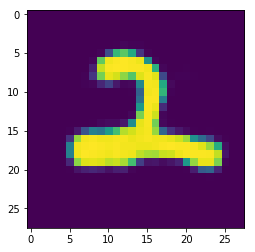

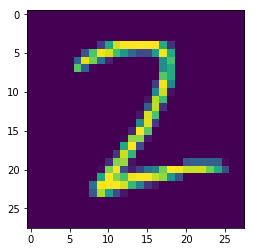

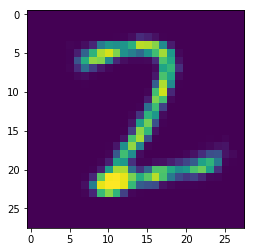

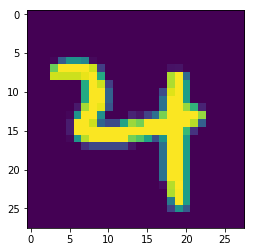

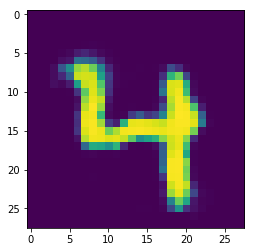

In [76]:
# 2. deep autoencoder
deep_autoencoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28,28,1)),
            tf.keras.layers.Flatten(),
            # encode
            tf.keras.layers.Dense(512, activation='relu',input_shape=(28*28,)),
            tf.keras.layers.Dense(256, activation='relu',input_shape=(512,)),
            # sim. PCA
            tf.keras.layers.Dense(128, activation='relu',input_shape=(256,)),
            # decode
            tf.keras.layers.Dense(256, activation='relu',input_shape=(128,)),
            tf.keras.layers.Dense(512, activation='relu',input_shape=(256,)),
            tf.keras.layers.Dense(28*28, activation='sigmoid',
                                     # SPARSITY constraint
                                  activity_regularizer = tf.keras.regularizers.l1(l=0.0001),
                                  input_shape=(512,)),
            tf.keras.layers.Reshape((28,28,1),input_shape=(28*28,))
        ])

deep_autoencoder.compile('adam',loss=tf.keras.losses.BinaryCrossentropy())

deep_autoencoder.fit(x_train, x_train,
          batch_size = 256,
          epochs = 10,
          shuffle=True,
          validation_data = (x_test,x_test)
         )

generated = deep_autoencoder.predict(x_test)

for i in np.random.choice(len(x_test), 5):
    real = x_test[i].reshape((28,28)) * 255.
    fake = generated[i].reshape((28,28)) * 255.
    plt.figure()
    plt.imshow(real.astype("uint8"))
    plt.figure()
    plt.imshow(fake.astype("uint8"))

x_train (2560, 200, 1)
y_train (2560, 200, 1)
x_test (5, 200, 1)
y_test (5, 200, 1)
layer 0 (None, 200, 1) (None, 200, 1)
layer 1 (None, 200, 1) (None, 200)
layer 2 (None, 200) (None, 200, 200)
layer 3 (None, 200, 200) (None, 200, 200)
layer 4 (None, 200, 200) (None, 200, 1)
Train on 2560 samples, validate on 5 samples
Epoch 1/20
2560/2560 [==============================] - 62s 24ms/sample - loss: 0.5548 - val_loss: 0.4938
Epoch 2/20
2560/2560 [==============================] - 56s 22ms/sample - loss: 0.4878 - val_loss: 0.4816
Epoch 3/20
2560/2560 [==============================] - 52s 21ms/sample - loss: 0.4546 - val_loss: 0.4251
Epoch 4/20
2560/2560 [==============================] - 52s 20ms/sample - loss: 0.4041 - val_loss: 0.4551
Epoch 5/20
2560/2560 [==============================] - 55s 21ms/sample - loss: 0.3922 - val_loss: 0.3536
Epoch 6/20
2560/2560 [==============================] - 50s 20ms/sample - loss: 0.3926 - val_loss: 0.3682
Epoch 7/20
2560/2560 [=====================

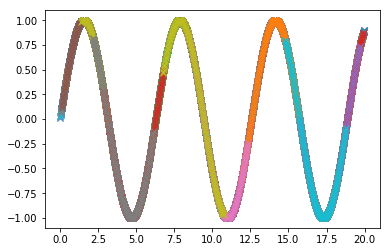

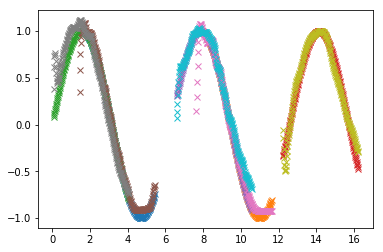

In [48]:
# 3. lstm autoencoder

epochs = 20
timesteps = 200 # long range time-series
batch_num = 80 
batch_size = 32
input_dim = 1 # dimension of x
output_dim = 1 # dimension of y
hidden_dim = 200

# generate data, exactly the same as 021
class TimeSeries():
    def __init__(self,x_min, x_max, num_points):
        self._x_min = x_min
        self._x_max = x_max
        self._interval = (x_max - x_min)/num_points
        self._x = np.linspace(self._x_min, self._x_max, num_points)
        self._y = np.sin(self._x)
        
    def next_batch(self, batch_size, steps):
        x_start = np.random.rand(batch_size,1)*(self._x_max - self._x_min - steps * self._interval) + self._x_min 
        x_batch = x_start + np.arange(0, steps+1) * self._interval
        y_batch = np.sin(x_batch)
        return x_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,:-1].reshape(-1, steps, 1)
ts = TimeSeries(0,20,1000)

x_train, y_train = ts.next_batch(batch_size,timesteps)
for i in range(batch_num-1):
    x,y = ts.next_batch(batch_size,timesteps)
    x_train = np.vstack((x_train,x))
    y_train = np.vstack((y_train,y))
print('x_train',x_train.shape)
print('y_train',y_train.shape)    

x_test,y_test = ts.next_batch(5,timesteps)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

for x,y in zip(x_train, y_train):
    plt.plot(x,y,"x")   
plt.figure()
for x,y in zip(x_test, y_test):
    plt.plot(x,y,"x")

    
# build model
inputs = tf.keras.layers.Input(shape=(timesteps,input_dim,))
encoded = tf.keras.layers.LSTM(hidden_dim)(inputs)
repeated = tf.keras.layers.RepeatVector(timesteps)(encoded)
decoded = tf.keras.layers.LSTM(hidden_dim, return_sequences=True)(repeated)
outputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(output_dim))(decoded)

encoder = tf.keras.Model(inputs, encoded)
decoder = tf.keras.Model(inputs, decoded)
lstm_autoencoder =  tf.keras.Model(inputs, outputs)
lstm_autoencoder.compile('adam',loss=tf.keras.losses.MeanSquaredError())

for i,layer in enumerate(lstm_autoencoder.layers):
    print('layer', str(i), layer.input_shape, layer.output_shape)

    
# train
lstm_autoencoder.fit(x_train, y_train,
            batch_size = batch_size,
            epochs=epochs,
            shuffle=True,
            validation_data = (x_test,y_test)
           )

# predict
y_pred = lstm_autoencoder.predict(x_test)
for x,y in zip(x_test, y_pred):
    plt.plot(x,y,"x")